In [67]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data

data = pd.DataFrame(features, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
X = data.iloc[:, [0, 2]]
y = iris.target
X.shape, y.shape

((150, 2), (150,))

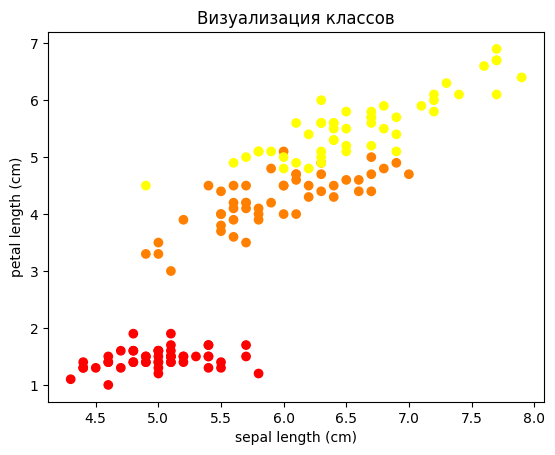

In [9]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.title("Визуализация классов")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

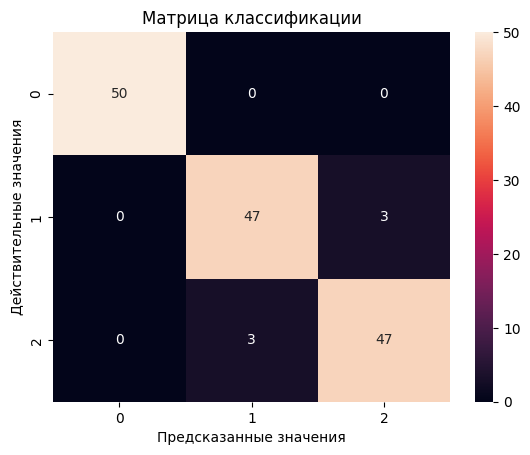

In [12]:
plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [13]:
X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

In [14]:
XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


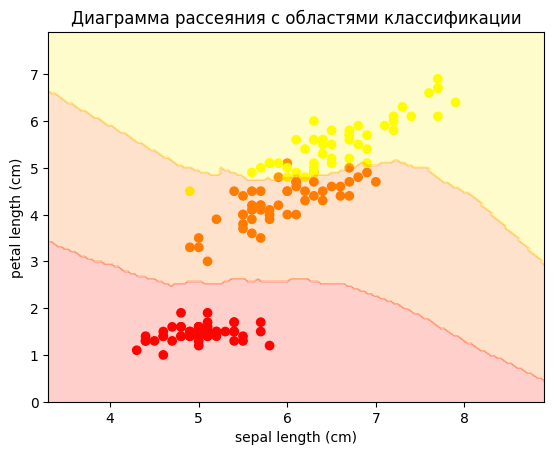

In [15]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

In [16]:
observation_new = [[5.5, 5]]
observation_new_scaled = scaler.transform(observation_new)
knn.predict(observation_new_scaled)
knn.predict_proba(observation_new_scaled)
distances, indices = knn.kneighbors(observation_new_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


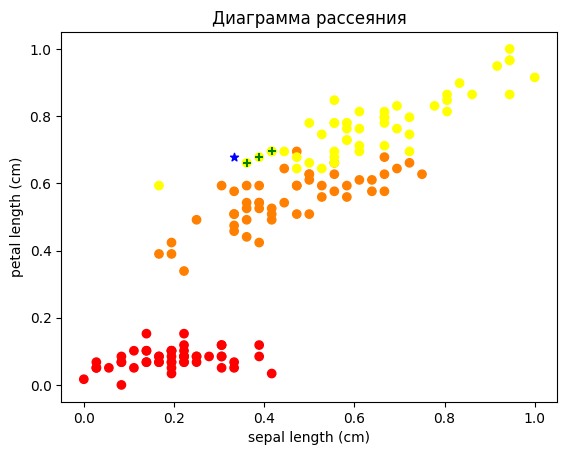

In [17]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

1. Постройте последний график методических указаний в исходном пространстве признаков.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


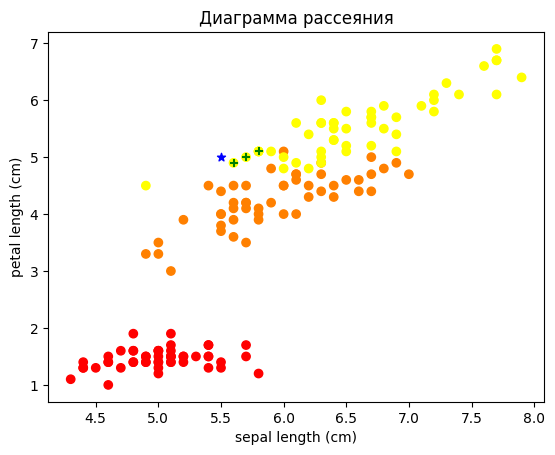

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data

X = data.iloc[:, [0, 2]]
y = iris.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

observation_new = [[5.5, 5]]
observation_new_scaled = scaler.transform(observation_new)

distances, indices = knn.kneighbors(observation_new_scaled)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b')

reverse = scaler.inverse_transform(X_scaled[indices[0]])
for i in range(3):
    plt.scatter(reverse[i][0], reverse[i][1],  marker='+', color='g')


plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()


2. Попробуйте обучить модель с другим значением k. Визуализируйте области классификации и сравните эффективности модели.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


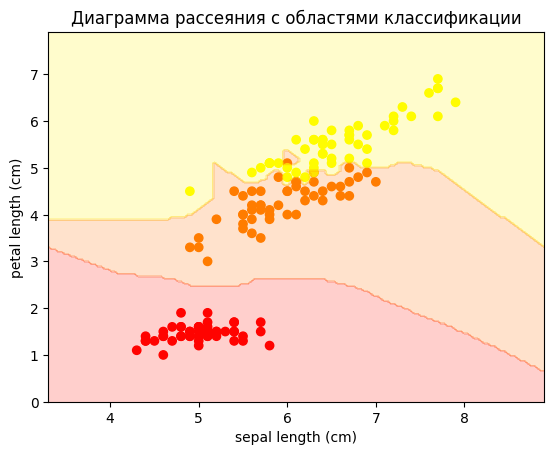

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


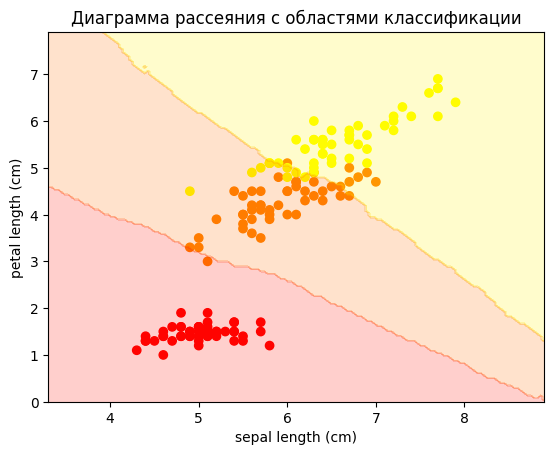

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

Если слишком мало, то модель недообучена, если слишком много, то также слишком часто допускает ошибки

3. Подвигайте новое наблюдение в последнем пункте методических указаний. Сдвиньте его за пределы области определения выборки. Как меняется нормализованное значение?

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


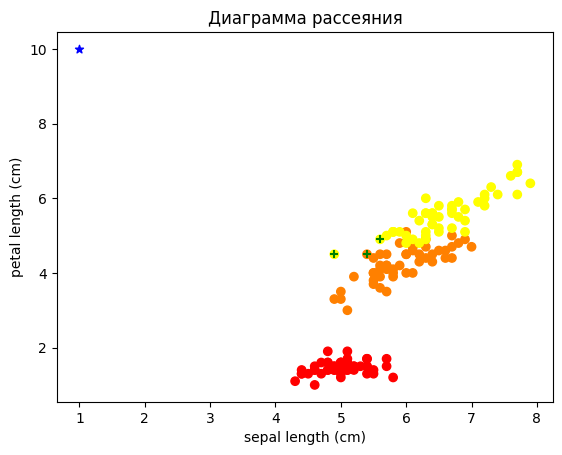

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data

X = data.iloc[:, [0, 2]]
y = iris.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

observation_new = [[1, 10]]
observation_new_scaled = scaler.transform(observation_new)

distances, indices = knn.kneighbors(observation_new_scaled)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b')

reverse = scaler.inverse_transform(X_scaled[indices[0]])
for i in range(3):
    plt.scatter(reverse[i][0], reverse[i][1],  marker='+', color='g')


plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


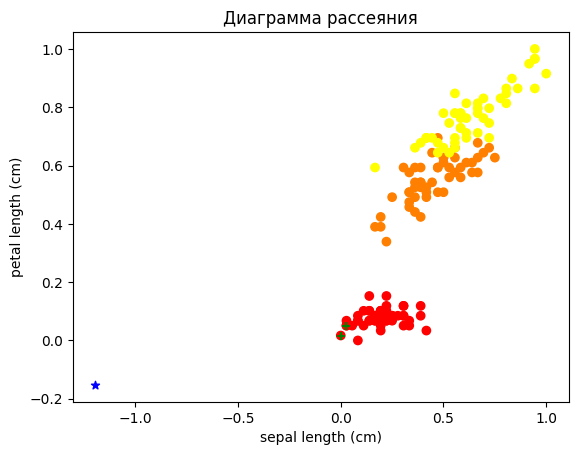

In [25]:
observation_new = [[0, 0.1]]
observation_new_scaled = scaler.transform(observation_new)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

distances, indices = knn.kneighbors(observation_new_scaled)

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

4. Поэкспериментируйте с разными метриками расстояния. Визуализируйте ближайших соседей нового объекта при разных метриках расстояния.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


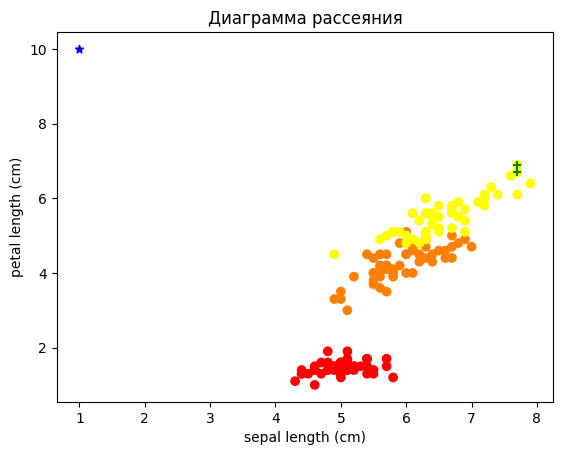

In [26]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data

X = data.iloc[:, [0, 2]]
y = iris.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3, metric = 'braycurtis')
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

observation_new = [[1, 10]]
observation_new_scaled = scaler.transform(observation_new)

distances, indices = knn.kneighbors(observation_new_scaled)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b')

reverse = scaler.inverse_transform(X_scaled[indices[0]])
for i in range(3):
    plt.scatter(reverse[i][0], reverse[i][1],  marker='+', color='g')


plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


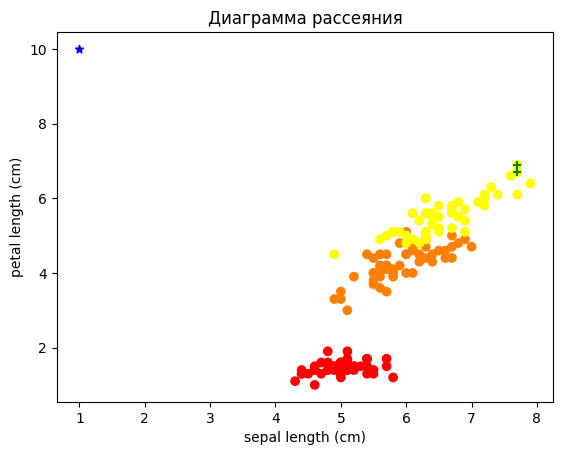

In [27]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data

X = data.iloc[:, [0, 2]]
y = iris.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3, metric = 'canberra')
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

observation_new = [[1, 10]]
observation_new_scaled = scaler.transform(observation_new)

distances, indices = knn.kneighbors(observation_new_scaled)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b')

reverse = scaler.inverse_transform(X_scaled[indices[0]])
for i in range(3):
    plt.scatter(reverse[i][0], reverse[i][1],  marker='+', color='g')


plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


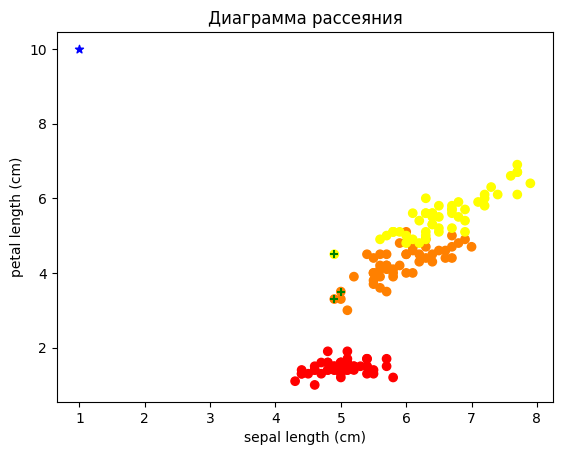

In [28]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data

X = data.iloc[:, [0, 2]]
y = iris.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3, metric = 'chebyshev')
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

observation_new = [[1, 10]]
observation_new_scaled = scaler.transform(observation_new)

distances, indices = knn.kneighbors(observation_new_scaled)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b')

reverse = scaler.inverse_transform(X_scaled[indices[0]])
for i in range(3):
    plt.scatter(reverse[i][0], reverse[i][1],  marker='+', color='g')


plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


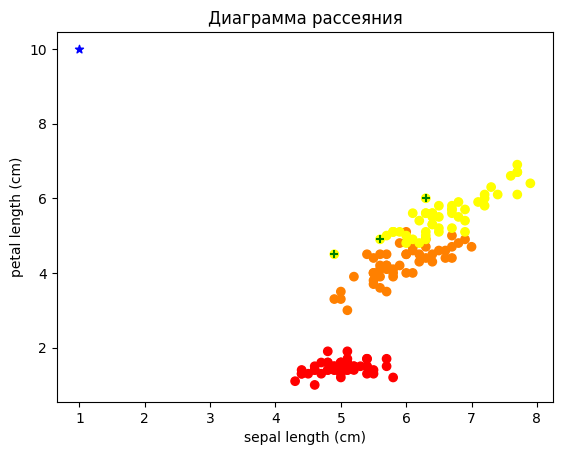

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data

X = data.iloc[:, [0, 2]]
y = iris.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3, metric = 'cityblock')
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

observation_new = [[1, 10]]
observation_new_scaled = scaler.transform(observation_new)

distances, indices = knn.kneighbors(observation_new_scaled)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b')

reverse = scaler.inverse_transform(X_scaled[indices[0]])
for i in range(3):
    plt.scatter(reverse[i][0], reverse[i][1],  marker='+', color='g')


plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

5. Обучите модель на полном датасете. Сравните ее эффективность с описанной в методических указаниях. Попробуйте разные значения k.

In [33]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data

X = data
y = iris.target

def learn_knn(x, y, k):
  scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(X)

  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_scaled, y)

  y_pred = knn.predict(X_scaled)

  print(classification_report(y_pred, y))

a = [1, 5, 50]

for i in a:
  print("-"*22, 'K = ', i, '-'*22)
  learn_knn(X, y, i)

---------------------- K =  1 ----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

---------------------- K =  5 ----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.92      0.94        52
           2       0.92      0.96      0.94        48

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

---------------------- K =  50 ----------------------
              precision    recall  f1-score   support

           0       1.00

6. Попробуйте в модели на полном датасете взвешенный алгоритм (аргумент weights объекта KNeighborsClassifier). Сравние его точность с равномерным вариантом.

In [38]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data

X = data
y = iris.target

def learn_knn(x, y, k):
  scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(X)

  knn = KNeighborsClassifier(n_neighbors=k, weights ='uniform')
  knn.fit(X_scaled, y)

  y_pred = knn.predict(X_scaled)

  print(classification_report(y_pred, y))

a = [100]

for i in a:
  print("-"*22, 'K = ', i, '-'*22)
  learn_knn(X, y, i)

---------------------- K =  100 ----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.51      0.68        98
           2       0.04      1.00      0.08         2

    accuracy                           0.68       150
   macro avg       0.68      0.84      0.58       150
weighted avg       0.99      0.68      0.78       150



In [37]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data

X = data
y = iris.target

def learn_knn(x, y, k):
  scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(X)

  knn = KNeighborsClassifier(n_neighbors=k, weights ='distance')
  knn.fit(X_scaled, y)

  y_pred = knn.predict(X_scaled)

  print(classification_report(y_pred, y))

a = [100]

for i in a:
  print("-"*22, 'K = ', i, '-'*22)
  learn_knn(X, y, i)

---------------------- K =  100 ----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



7. Постройте график точности (accuracy) модели в зависимости от значения k. Сделайте вывод.

Text(0, 0.5, 'accuracy')

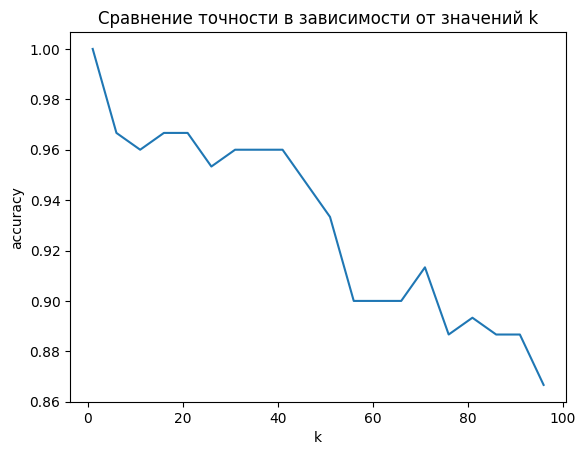

In [40]:
from sklearn.metrics import accuracy_score
def test_accuracy(x, y, k):
  scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(X)

  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_scaled, y)

  y_pred = knn.predict(X_scaled)
  return accuracy_score(y, y_pred)



iris = load_iris()
features = iris.data
x = data
y = iris.target

acc = list(map(lambda k: test_accuracy(x, y, k), np.arange(1, 100, 5)))
plt.plot(np.arange(1, 100, 5), acc)

plt.title("Сравнение точности в зависимости от значений k")
plt.xlabel('k')
plt.ylabel('accuracy')


8. Выберите датасет и постройте регрессию при помощи метода ближайших соседей.

In [57]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

X = housing.data
y = housing.target

In [69]:
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=18)
knn.fit(X,y)
y_pred = knn.predict(X)

mean_squared_error(y, y_pred)

0.993194842476382